In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read csv
la_liga = pd.read_csv("combined_data_laliga.csv")

In [4]:
la_liga

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,2655,EIBAR,BARCELONA,0-1,0-0,3.8,5.8,6.7,33,67,...,16.0,15.0,3.0,0.0,0.0,0,1,1,0,2020
2656,2656,REAL MADRID,VILLARREAL,2-1,0-1,5.9,6.8,6.0,55,45,...,26.0,13.0,0.0,0.0,0.0,2,1,1,2,2020
2657,2657,OSASUNA,REAL SOCIEDAD,0-1,0-0,3.1,5.4,7.0,43,57,...,18.0,7.0,0.0,0.0,0.0,0,1,1,0,2020
2658,2658,GRANADA,GETAFE,0-0,0-0,2.3,5.6,6.2,39,61,...,22.0,13.0,2.0,0.0,0.0,0,0,0,0,2020


In [5]:
la_liga.dtypes

Unnamed: 0                         int64
Home Team                         object
Away Team                         object
Score                             object
Half Time Score                   object
Match Excitement                 float64
Home Team Rating                 float64
Away Team Rating                 float64
Home Team Possession %             int64
Away Team Possession %             int64
Home Team Off Target Shots       float64
Home Team On Target Shots        float64
Home Team Total Shots            float64
Home Team Blocked Shots          float64
Home Team Corners                float64
Home Team Throw Ins              float64
Home Team Pass Success %         float64
Home Team Aerials Won            float64
Home Team Clearances             float64
Home Team Fouls                  float64
Home Team Yellow Cards           float64
Home Team Second Yellow Cards    float64
Home Team Red Cards              float64
Away Team Off Target Shots       float64
Away Team On Tar

In [6]:
#Remove score
la_liga = la_liga.drop(columns=["Score", "Home Team Goals Conceeded", "Away Team Goals Conceeded", "Unnamed: 0"])

In [7]:
for i in range(len(la_liga)):
    la_liga["Home Team Goals ht"] = 0
    la_liga["Away Team Goals ht"] = 0

for i in range(len(la_liga)):
    la_liga["Half Time Score"][i] = la_liga["Half Time Score"][i].split("-")
    la_liga["Home Team Goals ht"][i] = int(la_liga["Half Time Score"][i][0])
    la_liga["Away Team Goals ht"][i] = int(la_liga["Half Time Score"][i][1])

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2555303837.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga["Half Time Score"][i] = la_liga["Half Time Score"][i].split("-")
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2555303837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga["Home Team Goals ht"][i] = int(la_liga["Half Time Score"][i][0])
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2555303837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [8]:
la_liga.head()

,Home Team,Away Team,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht
0,MÁLAGA,ATHLETIC,"[1, 0]",4.4,6.0,5.7,40,60,5.0,3.0,...,14.0,9.0,3.0,0.0,0.0,1,0,2014,1,0
1,SEVILLA FC,VALENCIA,"[1, 0]",4.7,6.5,6.8,47,53,4.0,3.0,...,16.0,8.0,2.0,0.0,1.0,1,1,2014,1,0
2,GRANADA,DEPORTIVO,"[0, 1]",4.6,7.2,5.9,53,47,6.0,3.0,...,14.0,26.0,3.0,0.0,0.0,2,1,2014,0,1
3,ALMERÍA,ESPANYOL,"[0, 0]",5.6,6.9,5.5,56,44,7.0,6.0,...,20.0,9.0,3.0,1.0,0.0,1,1,2014,0,0
4,EIBAR,REAL SOCIEDAD,"[1, 0]",3.7,6.5,5.9,41,59,5.0,5.0,...,20.0,14.0,1.0,0.0,0.0,1,0,2014,1,0


(0.0, 11.0)

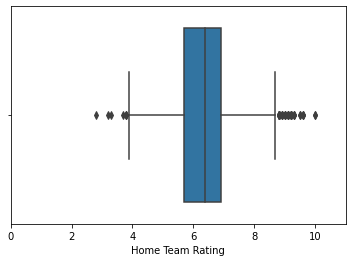

In [129]:
sns.boxplot(x="Home Team Rating", data=la_liga)
plt.xlim(0, 11)

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


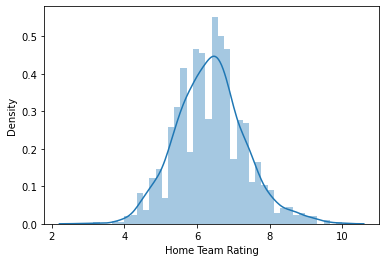

In [127]:
sns.distplot(la_liga["Home Team Rating"])
plt.show()

In [10]:
la_liga = la_liga.drop(columns="Half Time Score")

In [11]:
la_liga.head()

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht
0,MÁLAGA,ATHLETIC,4.4,6.0,5.7,40,60,5.0,3.0,12.0,...,14.0,9.0,3.0,0.0,0.0,1,0,2014,1,0
1,SEVILLA FC,VALENCIA,4.7,6.5,6.8,47,53,4.0,3.0,12.0,...,16.0,8.0,2.0,0.0,1.0,1,1,2014,1,0
2,GRANADA,DEPORTIVO,4.6,7.2,5.9,53,47,6.0,3.0,10.0,...,14.0,26.0,3.0,0.0,0.0,2,1,2014,0,1
3,ALMERÍA,ESPANYOL,5.6,6.9,5.5,56,44,7.0,6.0,19.0,...,20.0,9.0,3.0,1.0,0.0,1,1,2014,0,0
4,EIBAR,REAL SOCIEDAD,3.7,6.5,5.9,41,59,5.0,5.0,12.0,...,20.0,14.0,1.0,0.0,0.0,1,0,2014,1,0


In [12]:
#check for NaN
la_liga.isnull().sum()

Home Team                        0
Away Team                        0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins              0
Away Team Pass Success %         0
Away Team Aerials Won            0
Away Team Clearances

In [13]:
#check for duplicated
la_liga.duplicated().sum()

0

In [14]:
for n in range(len(la_liga)):
    la_liga["Home Team Result"] = 0
    la_liga["Away Team Result"] = 0
for i in range(len(la_liga)):
    if la_liga["Home Team Goals Scored"][i] < la_liga["Away Team Goals Scored"][i]:
        la_liga["Home Team Result"][i] += 0
        la_liga["Away Team Result"][i] += 3
    elif la_liga["Home Team Goals Scored"][i] == la_liga["Away Team Goals Scored"][i]:
        la_liga["Home Team Result"][i] += 1
        la_liga["Away Team Result"][i] += 1
    else:
        la_liga["Home Team Result"][i] += 3
        la_liga["Away Team Result"][i] += 0


/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4090481898.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga["Home Team Result"][i] += 3
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4090481898.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga["Away Team Result"][i] += 0
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4090481898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [15]:
la_liga

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht,Home Team Result,Away Team Result
0,MÁLAGA,ATHLETIC,4.4,6.0,5.7,40,60,5.0,3.0,12.0,...,3.0,0.0,0.0,1,0,2014,1,0,3,0
1,SEVILLA FC,VALENCIA,4.7,6.5,6.8,47,53,4.0,3.0,12.0,...,2.0,0.0,1.0,1,1,2014,1,0,1,1
2,GRANADA,DEPORTIVO,4.6,7.2,5.9,53,47,6.0,3.0,10.0,...,3.0,0.0,0.0,2,1,2014,0,1,3,0
3,ALMERÍA,ESPANYOL,5.6,6.9,5.5,56,44,7.0,6.0,19.0,...,3.0,1.0,0.0,1,1,2014,0,0,1,1
4,EIBAR,REAL SOCIEDAD,3.7,6.5,5.9,41,59,5.0,5.0,12.0,...,1.0,0.0,0.0,1,0,2014,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,EIBAR,BARCELONA,3.8,5.8,6.7,33,67,8.0,3.0,17.0,...,3.0,0.0,0.0,0,1,2020,0,0,0,3
2656,REAL MADRID,VILLARREAL,5.9,6.8,6.0,55,45,8.0,4.0,14.0,...,0.0,0.0,0.0,2,1,2020,0,1,3,0
2657,OSASUNA,REAL SOCIEDAD,3.1,5.4,7.0,43,57,3.0,1.0,7.0,...,0.0,0.0,0.0,0,1,2020,0,0,0,3
2658,GRANADA,GETAFE,2.3,5.6,6.2,39,61,5.0,3.0,9.0,...,2.0,0.0,0.0,0,0,2020,0,0,1,1


In [16]:
la_liga_Home = la_liga["Home Team"] == "BARCELONA"
la_liga_Away = la_liga["Away Team"] == "BARCELONA"
la_liga_only_Barcelona = la_liga["Away Team"] == "BARCELONA"
for i in range(len(la_liga_Home)):
    if la_liga_Away[i] or la_liga_Home[i]:
        la_liga_only_Barcelona[i] = True
    else:
        la_liga_only_Barcelona[i] = False
la_liga_Barcelona = la_liga[la_liga_only_Barcelona]
print(la_liga_Barcelona)

       Home Team        Away Team  Match Excitement  Home Team Rating  \
5      BARCELONA            ELCHE               5.1               8.0   
16    VILLARREAL        BARCELONA               5.2               5.5   
21     BARCELONA         ATHLETIC               4.3               7.7   
38       LEVANTE        BARCELONA               5.9               4.0   
45        MÁLAGA        BARCELONA               2.2               6.9   
...          ...              ...               ...               ...   
2618    VALENCIA        BARCELONA               8.2               5.3   
2622   BARCELONA  ATLETICO MADRID               3.6               6.8   
2632     LEVANTE        BARCELONA               9.7               6.5   
2640   BARCELONA            CELTA               6.4               5.6   
2655       EIBAR        BARCELONA               3.8               5.8   

      Away Team Rating  Home Team Possession %  Away Team Possession %  \
5                  5.3                      72   

In [17]:
#Filter year to analyze different years
la_liga_2014 = la_liga_Barcelona.loc[la_liga["year"]== 2014]
la_liga_2015 = la_liga_Barcelona.loc[la_liga["year"]== 2015]
la_liga_2016 = la_liga_Barcelona.loc[la_liga["year"]== 2016]
la_liga_2017 = la_liga_Barcelona.loc[la_liga["year"]== 2017]
la_liga_2018 = la_liga_Barcelona.loc[la_liga["year"]== 2018]
la_liga_2019 = la_liga_Barcelona.loc[la_liga["year"]== 2019]
la_liga_2020 = la_liga_Barcelona.loc[la_liga["year"]== 2020]

# Wie hat sich die Spielweise des FC Barcelona verändert unter Valverde (Trainer 2017-2020) im Vergleich zu Enrique (Trainer 2014-2017)

## Prepare Data

In [18]:
la_liga_2014

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht,Home Team Result,Away Team Result
5,BARCELONA,ELCHE,5.1,8.0,5.3,72,28,5.0,6.0,12.0,...,1.0,0.0,0.0,3,0,2014,1,0,3,0
16,VILLARREAL,BARCELONA,5.2,5.5,7.7,28,72,7.0,0.0,9.0,...,2.0,0.0,0.0,0,1,2014,0,0,0,3
21,BARCELONA,ATHLETIC,4.3,7.7,5.7,61,39,5.0,8.0,14.0,...,1.0,0.0,0.0,2,0,2014,0,0,3,0
38,LEVANTE,BARCELONA,5.9,4.0,8.7,25,75,3.0,2.0,9.0,...,2.0,0.0,0.0,0,5,2014,0,2,0,3
45,MÁLAGA,BARCELONA,2.2,6.9,5.9,31,69,4.0,2.0,6.0,...,2.0,0.0,0.0,0,0,2014,0,0,1,1
52,BARCELONA,GRANADA,7.0,10.0,3.7,69,31,5.0,12.0,19.0,...,3.0,0.0,0.0,6,0,2014,3,0,3,0
62,RAYO VALLECANO,BARCELONA,5.3,4.7,6.8,41,59,8.0,4.0,14.0,...,2.0,0.0,0.0,0,2,2014,0,2,0,3
73,BARCELONA,EIBAR,6.0,8.7,5.2,75,25,9.0,12.0,27.0,...,2.0,0.0,0.0,3,0,2014,0,0,3,0
82,REAL MADRID,BARCELONA,7.4,7.4,5.6,42,58,5.0,6.0,18.0,...,4.0,0.0,0.0,3,1,2014,1,1,3,0
93,BARCELONA,CELTA,5.4,6.5,6.7,67,33,10.0,9.0,19.0,...,2.0,0.0,0.0,0,1,2014,0,0,0,3


In [19]:
la_liga_2014

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht,Home Team Result,Away Team Result
5,BARCELONA,ELCHE,5.1,8.0,5.3,72,28,5.0,6.0,12.0,...,1.0,0.0,0.0,3,0,2014,1,0,3,0
16,VILLARREAL,BARCELONA,5.2,5.5,7.7,28,72,7.0,0.0,9.0,...,2.0,0.0,0.0,0,1,2014,0,0,0,3
21,BARCELONA,ATHLETIC,4.3,7.7,5.7,61,39,5.0,8.0,14.0,...,1.0,0.0,0.0,2,0,2014,0,0,3,0
38,LEVANTE,BARCELONA,5.9,4.0,8.7,25,75,3.0,2.0,9.0,...,2.0,0.0,0.0,0,5,2014,0,2,0,3
45,MÁLAGA,BARCELONA,2.2,6.9,5.9,31,69,4.0,2.0,6.0,...,2.0,0.0,0.0,0,0,2014,0,0,1,1
52,BARCELONA,GRANADA,7.0,10.0,3.7,69,31,5.0,12.0,19.0,...,3.0,0.0,0.0,6,0,2014,3,0,3,0
62,RAYO VALLECANO,BARCELONA,5.3,4.7,6.8,41,59,8.0,4.0,14.0,...,2.0,0.0,0.0,0,2,2014,0,2,0,3
73,BARCELONA,EIBAR,6.0,8.7,5.2,75,25,9.0,12.0,27.0,...,2.0,0.0,0.0,3,0,2014,0,0,3,0
82,REAL MADRID,BARCELONA,7.4,7.4,5.6,42,58,5.0,6.0,18.0,...,4.0,0.0,0.0,3,1,2014,1,1,3,0
93,BARCELONA,CELTA,5.4,6.5,6.7,67,33,10.0,9.0,19.0,...,2.0,0.0,0.0,0,1,2014,0,0,0,3


In [20]:
#Groupby Home Team
la_liga_2014_home_gb = la_liga_2014.groupby(["Home Team"])["Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/1108315237.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2014_home_gb = la_liga_2014.groupby(["Home Team"])["Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [21]:
#Groupby Away Team
la_liga_2014_away_gb = la_liga_2014.groupby(["Away Team"])["Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3171837015.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2014_away_gb = la_liga_2014.groupby(["Away Team"])["Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [22]:
#Reanme all columns to join the dataframes
la_liga_2014_home_gb = la_liga_2014_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [23]:
#Reanme all columns to join the dataframes
la_liga_2014_away_gb = la_liga_2014_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [24]:
la_liga_2014_away_gb

,Away Goals received,Away Goals Scored,Away Goals received ht,Away Goals ht,Away Points,Away Rating,Away Off Target Shots,Away On Target Shots,Away Total Shots,Away Blocked Shots,Away Corners,Away Pass Success %,Away Fouls,Away Yellow Cards,Away Second Yellow Cards,Away Red Cards
Away Team,,,,,,,,,,,,,,,,
ALMERÍA,4,0,1,0,0,4.5,2.0,3.0,6.0,1.0,5.0,73.0,14.0,3.0,0.0,0.0
ATHLETIC,2,0,0,0,0,5.7,1.0,2.0,3.0,0.0,1.0,74.0,11.0,1.0,0.0,0.0
ATLETICO MADRID,3,1,2,0,0,5.2,2.0,3.0,5.0,0.0,3.0,69.0,18.0,6.0,0.0,0.0
BARCELONA,10,46,4,18,45,139.9,122.0,111.0,303.0,70.0,108.0,1661.0,173.0,37.0,1.0,0.0
CELTA,0,1,0,0,3,6.7,2.0,4.0,10.0,4.0,5.0,63.0,29.0,2.0,0.0,0.0
CÓRDOBA,5,0,1,0,0,4.7,4.0,2.0,7.0,1.0,0.0,75.0,5.0,0.0,0.0,0.0
DEPORTIVO,2,2,1,0,1,7.2,3.0,2.0,10.0,5.0,4.0,72.0,9.0,3.0,0.0,0.0
EIBAR,3,0,0,0,0,5.2,2.0,2.0,4.0,0.0,3.0,69.0,13.0,2.0,0.0,0.0
ELCHE,3,0,1,0,0,5.3,3.0,0.0,3.0,0.0,1.0,81.0,13.0,1.0,0.0,0.0


In [25]:
#Concat the two dataframes for analyze the season
la_liga_2014_concat = pd.concat([la_liga_2014_away_gb, la_liga_2014_home_gb],axis=1, join="inner")

In [26]:
la_liga_2014_concat

,Away Goals received,Away Goals Scored,Away Goals received ht,Away Goals ht,Away Points,Away Rating,Away Off Target Shots,Away On Target Shots,Away Total Shots,Away Blocked Shots,...,Home Off Target Shots,Home On Target Shots,Home Total Shots,Home Blocked Shots,Home Corners,Home Pass Success %,Home Fouls,Home Yellow Cards,Home Second Yellow Cards,Home Red Cards
ALMERÍA,4,0,1,0,0,4.5,2.0,3.0,6.0,1.0,...,3.0,2.0,6.0,1.0,4.0,60.0,16.0,2.0,0.0,0.0
ATHLETIC,2,0,0,0,0,5.7,1.0,2.0,3.0,0.0,...,4.0,6.0,15.0,5.0,4.0,65.0,15.0,3.0,0.0,1.0
ATLETICO MADRID,3,1,2,0,0,5.2,2.0,3.0,5.0,0.0,...,4.0,3.0,10.0,3.0,6.0,62.0,23.0,5.0,0.0,0.0
BARCELONA,10,46,4,18,45,139.9,122.0,111.0,303.0,70.0,...,115.0,162.0,322.0,45.0,128.0,1681.0,197.0,31.0,0.0,2.0
CELTA,0,1,0,0,3,6.7,2.0,4.0,10.0,4.0,...,6.0,1.0,7.0,0.0,4.0,72.0,26.0,2.0,0.0,1.0
CÓRDOBA,5,0,1,0,0,4.7,4.0,2.0,7.0,1.0,...,4.0,1.0,5.0,0.0,5.0,69.0,11.0,2.0,0.0,0.0
DEPORTIVO,2,2,1,0,1,7.2,3.0,2.0,10.0,5.0,...,4.0,2.0,7.0,1.0,2.0,73.0,14.0,2.0,0.0,0.0
EIBAR,3,0,0,0,0,5.2,2.0,2.0,4.0,0.0,...,5.0,2.0,13.0,6.0,6.0,66.0,14.0,1.0,0.0,0.0
ELCHE,3,0,1,0,0,5.3,3.0,0.0,3.0,0.0,...,2.0,3.0,6.0,1.0,2.0,71.0,18.0,6.0,1.0,0.0
ESPANYOL,5,1,1,1,0,4.8,1.0,2.0,3.0,0.0,...,3.0,2.0,7.0,2.0,5.0,78.0,21.0,6.0,1.0,0.0


In [27]:
for i in range(len(la_liga_2014_concat)):
    la_liga_2014_concat["Points"] = 0
    la_liga_2014_concat["Goals Scored"] = 0
    la_liga_2014_concat["Goals received"] = 0
    la_liga_2014_concat["Goals ht"] = 0
    la_liga_2014_concat["Goals received ht"] = 0
    la_liga_2014_concat["Rating mean"] = 0
    la_liga_2014_concat["On Target Shots"] = 0
    la_liga_2014_concat["Off Target Shots"] = 0
    la_liga_2014_concat["Blocked Shots"] = 0
    la_liga_2014_concat["Corners"] = 0
    la_liga_2014_concat["Fouls"] = 0
    la_liga_2014_concat["First Yellow Cards"] = 0
    la_liga_2014_concat["Second Yellow Cards"] = 0
    la_liga_2014_concat["Yellow Cards"] = 0
    la_liga_2014_concat["Red Cards"] = 0
    la_liga_2014_concat["Pass Success mean"] = 0


la_liga_2014_concat["Home Points"][0]

0

In [28]:
for i in range(len(la_liga_2014_concat)):
    la_liga_2014_concat["Points"][i] = la_liga_2014_concat["Home Points"][i] + la_liga_2014_concat["Away Points"][i]
    la_liga_2014_concat["Goals Scored"][i] = la_liga_2014_concat["Home Goals Scored"][i] + la_liga_2014_concat["Away Goals Scored"][i]
    la_liga_2014_concat["Goals received"][i] = la_liga_2014_concat["Home Goals received"][i] + la_liga_2014_concat["Away Goals received"][i]
    la_liga_2014_concat["Goals ht"][i] = la_liga_2014_concat["Home Goals ht"][i] + la_liga_2014_concat["Away Goals ht"][i]
    la_liga_2014_concat["Goals received ht"][i] = la_liga_2014_concat["Home Goals received ht"][i] + la_liga_2014_concat["Away Goals received ht"][i]
    la_liga_2014_concat["Rating mean"][i] = la_liga_2014_concat["Home Rating"][i] + la_liga_2014_concat["Away Rating"][i] / 38
    la_liga_2014_concat["On Target Shots"][i] = la_liga_2014_concat["Home On Target Shots"][i] + la_liga_2014_concat["Away On Target Shots"][i]
    la_liga_2014_concat["Off Target Shots"][i] = la_liga_2014_concat["Home Off Target Shots"][i] + la_liga_2014_concat["Away Off Target Shots"][i]
    la_liga_2014_concat["Blocked Shots"][i] = la_liga_2014_concat["Home Blocked Shots"][i] + la_liga_2014_concat["Away Blocked Shots"][i]
    la_liga_2014_concat["Corners"][i] = la_liga_2014_concat["Home Corners"][i] + la_liga_2014_concat["Away Corners"][i]
    la_liga_2014_concat["Fouls"][i] = la_liga_2014_concat["Home Fouls"][i] + la_liga_2014_concat["Away Fouls"][i]
    la_liga_2014_concat["First Yellow Cards"][i] = la_liga_2014_concat["Home Yellow Cards"][i] + la_liga_2014_concat["Away Yellow Cards"][i]
    la_liga_2014_concat["Second Yellow Cards"][i] = la_liga_2014_concat["Home Second Yellow Cards"][i] + la_liga_2014_concat["Away Second Yellow Cards"][i]
    la_liga_2014_concat["Yellow Cards"][i] = la_liga_2014_concat["Home Yellow Cards"][i] + la_liga_2014_concat["Away Yellow Cards"][i] + la_liga_2014_concat["Home Second Yellow Cards"][i] + la_liga_2014_concat["Away Second Yellow Cards"][i]
    la_liga_2014_concat["Red Cards"][i] = la_liga_2014_concat["Home Red Cards"][i] + la_liga_2014_concat["Away Red Cards"][i]
    la_liga_2014_concat["Pass Success mean"][i] = (la_liga_2014_concat["Home Pass Success %"][i] + la_liga_2014_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4218982426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2014_concat["Points"][i] = la_liga_2014_concat["Home Points"][i] + la_liga_2014_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4218982426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2014_concat["Goals Scored"][i] = la_liga_2014_concat["Home Goals Scored"][i] + la_liga_2014_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4218982426.py:4: SettingWithCopyWarning: 
A value is trying to b

In [29]:
la_liga_2014_concat = la_liga_2014_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [30]:
la_liga_2014_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALMERÍA,0,1,6,1,1,5,5,5,2,9,30,5,0,0,3
ATHLETIC,0,2,7,0,2,4,8,5,5,5,26,4,0,1,3
ATLETICO MADRID,0,1,4,0,2,5,6,6,3,9,41,11,0,0,3
BARCELONA,94,110,21,40,8,154,273,237,115,236,370,68,1,2,87
CELTA,3,1,1,0,0,5,5,8,4,9,55,4,0,1,3
CÓRDOBA,0,0,13,0,3,2,3,8,1,5,16,2,0,0,3
DEPORTIVO,1,2,6,0,3,4,4,7,6,6,23,5,0,0,3
EIBAR,0,0,5,0,1,5,4,7,6,9,27,3,0,0,3
ELCHE,0,0,9,0,2,3,3,5,1,3,31,7,1,0,4
ESPANYOL,0,1,7,1,3,5,4,4,2,7,32,10,1,0,3


In [31]:
la_liga_2014_concat_max = la_liga_2014_concat.max()

In [32]:
la_liga_2014_concat_max

Points                  94
Goals Scored           110
Goals received          21
Goals ht                40
Goals received ht        8
Rating mean            154
On Target Shots        273
Off Target Shots       237
Blocked Shots          115
Corners                236
Fouls                  370
First Yellow Cards      68
Second Yellow Cards      3
Red Cards                2
Pass Success mean       87
dtype: int64

## Prepare Data 2015

In [33]:
#Groupby Home Team
la_liga_2015_home_gb = la_liga_2015.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/824876337.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2015_home_gb = la_liga_2015.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [34]:
#Groupby Away Team
la_liga_2015_away_gb = la_liga_2015.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2347900123.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2015_away_gb = la_liga_2015.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [35]:
#Reanme all columns to join the dataframes
la_liga_2015_home_gb = la_liga_2015_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [36]:
#Reanme all columns to join the dataframes
la_liga_2015_away_gb = la_liga_2015_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [37]:
#Concat the two dataframes for analyze the season
la_liga_2015_concat = pd.concat([la_liga_2015_away_gb, la_liga_2015_home_gb],axis=1, join="inner")

In [38]:
for i in range(len(la_liga_2015_concat)):
    la_liga_2015_concat["Points"] = 0
    la_liga_2015_concat["Goals Scored"] = 0
    la_liga_2015_concat["Goals received"] = 0
    la_liga_2015_concat["Goals ht"] = 0
    la_liga_2015_concat["Goals received ht"] = 0
    la_liga_2015_concat["Rating mean"] = 0
    la_liga_2015_concat["On Target Shots"] = 0
    la_liga_2015_concat["Off Target Shots"] = 0
    la_liga_2015_concat["Blocked Shots"] = 0
    la_liga_2015_concat["Corners"] = 0
    la_liga_2015_concat["Fouls"] = 0
    la_liga_2015_concat["First Yellow Cards"] = 0
    la_liga_2015_concat["Second Yellow Cards"] = 0
    la_liga_2015_concat["Yellow Cards"] = 0
    la_liga_2015_concat["Red Cards"] = 0
    la_liga_2015_concat["Pass Success mean"] = 0


la_liga_2015_concat["Home Points"][0]

0

In [39]:
for i in range(len(la_liga_2015_concat)):
    la_liga_2015_concat["Points"][i] = la_liga_2015_concat["Home Points"][i] + la_liga_2015_concat["Away Points"][i]
    la_liga_2015_concat["Goals Scored"][i] = la_liga_2015_concat["Home Goals Scored"][i] + la_liga_2015_concat["Away Goals Scored"][i]
    la_liga_2015_concat["Goals received"][i] = la_liga_2015_concat["Home Goals received"][i] + la_liga_2015_concat["Away Goals received"][i]
    la_liga_2015_concat["Goals ht"][i] = la_liga_2015_concat["Home Goals ht"][i] + la_liga_2015_concat["Away Goals ht"][i]
    la_liga_2015_concat["Goals received ht"][i] = la_liga_2015_concat["Home Goals received ht"][i] + la_liga_2015_concat["Away Goals received ht"][i]
    la_liga_2015_concat["Rating mean"][i] = la_liga_2015_concat["Home Rating"][i] + la_liga_2015_concat["Away Rating"][i] / 38
    la_liga_2015_concat["On Target Shots"][i] = la_liga_2015_concat["Home On Target Shots"][i] + la_liga_2015_concat["Away On Target Shots"][i]
    la_liga_2015_concat["Off Target Shots"][i] = la_liga_2015_concat["Home Off Target Shots"][i] + la_liga_2015_concat["Away Off Target Shots"][i]
    la_liga_2015_concat["Blocked Shots"][i] = la_liga_2015_concat["Home Blocked Shots"][i] + la_liga_2015_concat["Away Blocked Shots"][i]
    la_liga_2015_concat["Corners"][i] = la_liga_2015_concat["Home Corners"][i] + la_liga_2015_concat["Away Corners"][i]
    la_liga_2015_concat["Fouls"][i] = la_liga_2015_concat["Home Fouls"][i] + la_liga_2015_concat["Away Fouls"][i]
    la_liga_2015_concat["First Yellow Cards"][i] = la_liga_2015_concat["Home Yellow Cards"][i] + la_liga_2015_concat["Away Yellow Cards"][i]
    la_liga_2015_concat["Second Yellow Cards"][i] = la_liga_2015_concat["Home Second Yellow Cards"][i] + la_liga_2015_concat["Away Second Yellow Cards"][i]
    la_liga_2015_concat["Yellow Cards"][i] = la_liga_2015_concat["Home Yellow Cards"][i] + la_liga_2015_concat["Away Yellow Cards"][i] + la_liga_2015_concat["Home Second Yellow Cards"][i] + la_liga_2015_concat["Away Second Yellow Cards"][i]
    la_liga_2015_concat["Red Cards"][i] = la_liga_2015_concat["Home Red Cards"][i] + la_liga_2015_concat["Away Red Cards"][i]
    la_liga_2015_concat["Pass Success mean"][i] = (la_liga_2015_concat["Home Pass Success %"][i] + la_liga_2015_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2787208830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2015_concat["Points"][i] = la_liga_2015_concat["Home Points"][i] + la_liga_2015_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2787208830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2015_concat["Goals Scored"][i] = la_liga_2015_concat["Home Goals Scored"][i] + la_liga_2015_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2787208830.py:4: SettingWithCopyWarning: 
A value is trying to b

In [40]:
la_liga_2015_concat = la_liga_2015_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [41]:
la_liga_2015_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ATHLETIC,0,0,7,0,2,5,5,6,6,4,23,5,0,1,3
ATLETICO MADRID,0,2,4,1,2,6,7,8,3,7,35,7,1,1,4
BARCELONA,91,112,29,42,13,148,266,230,109,221,383,67,0,1,86
CELTA,3,5,7,3,1,7,9,14,5,6,35,6,0,0,3
DEPORTIVO,1,2,10,0,3,3,10,14,5,8,22,3,0,0,4
EIBAR,0,1,7,1,3,4,5,7,2,8,36,8,0,0,3
ESPANYOL,1,0,5,0,1,6,3,4,1,6,47,12,0,0,3
GETAFE,0,0,8,0,5,5,1,8,3,6,23,6,0,0,3
GIJÓN,0,1,9,1,3,4,5,4,2,2,22,5,1,0,3
GRANADA,0,0,7,0,4,4,6,8,2,5,31,9,0,0,4


In [42]:
la_liga_2015_concat_max = la_liga_2015_concat.max()

In [43]:
la_liga_2015_concat_max

Points                  91
Goals Scored           112
Goals received          29
Goals ht                42
Goals received ht       13
Rating mean            148
On Target Shots        266
Off Target Shots       230
Blocked Shots          109
Corners                221
Fouls                  383
First Yellow Cards      67
Second Yellow Cards      1
Red Cards                2
Pass Success mean       86
dtype: int64

## Prepare Data 2016

In [44]:
#Groupby Home Team
la_liga_2016_home_gb = la_liga_2016.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4223108563.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2016_home_gb = la_liga_2016.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [45]:
#Groupby Away Team
la_liga_2016_away_gb = la_liga_2016.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/255767970.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2016_away_gb = la_liga_2016.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [46]:
#Reanme all columns to join the dataframes
la_liga_2016_home_gb = la_liga_2016_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [47]:
#Reanme all columns to join the dataframes
la_liga_2016_away_gb = la_liga_2016_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [48]:
#Concat the two dataframes for analyze the season
la_liga_2016_concat = pd.concat([la_liga_2016_away_gb, la_liga_2016_home_gb],axis=1, join="inner")

In [49]:
for i in range(len(la_liga_2016_concat)):
    la_liga_2016_concat["Points"] = 0
    la_liga_2016_concat["Goals Scored"] = 0
    la_liga_2016_concat["Goals received"] = 0
    la_liga_2016_concat["Goals ht"] = 0
    la_liga_2016_concat["Goals received ht"] = 0
    la_liga_2016_concat["Rating mean"] = 0
    la_liga_2016_concat["On Target Shots"] = 0
    la_liga_2016_concat["Off Target Shots"] = 0
    la_liga_2016_concat["Blocked Shots"] = 0
    la_liga_2016_concat["Corners"] = 0
    la_liga_2016_concat["Fouls"] = 0
    la_liga_2016_concat["First Yellow Cards"] = 0
    la_liga_2016_concat["Second Yellow Cards"] = 0
    la_liga_2016_concat["Yellow Cards"] = 0
    la_liga_2016_concat["Red Cards"] = 0
    la_liga_2016_concat["Pass Success mean"] = 0


la_liga_2016_concat["Home Points"][0]

0

In [50]:
for i in range(len(la_liga_2016_concat)):
    la_liga_2016_concat["Points"][i] = la_liga_2016_concat["Home Points"][i] + la_liga_2016_concat["Away Points"][i]
    la_liga_2016_concat["Goals Scored"][i] = la_liga_2016_concat["Home Goals Scored"][i] + la_liga_2016_concat["Away Goals Scored"][i]
    la_liga_2016_concat["Goals received"][i] = la_liga_2016_concat["Home Goals received"][i] + la_liga_2016_concat["Away Goals received"][i]
    la_liga_2016_concat["Goals ht"][i] = la_liga_2016_concat["Home Goals ht"][i] + la_liga_2016_concat["Away Goals ht"][i]
    la_liga_2016_concat["Goals received ht"][i] = la_liga_2016_concat["Home Goals received ht"][i] + la_liga_2016_concat["Away Goals received ht"][i]
    la_liga_2016_concat["Rating mean"][i] = la_liga_2016_concat["Home Rating"][i] + la_liga_2016_concat["Away Rating"][i] / 38
    la_liga_2016_concat["On Target Shots"][i] = la_liga_2016_concat["Home On Target Shots"][i] + la_liga_2016_concat["Away On Target Shots"][i]
    la_liga_2016_concat["Off Target Shots"][i] = la_liga_2016_concat["Home Off Target Shots"][i] + la_liga_2016_concat["Away Off Target Shots"][i]
    la_liga_2016_concat["Blocked Shots"][i] = la_liga_2016_concat["Home Blocked Shots"][i] + la_liga_2016_concat["Away Blocked Shots"][i]
    la_liga_2016_concat["Corners"][i] = la_liga_2016_concat["Home Corners"][i] + la_liga_2016_concat["Away Corners"][i]
    la_liga_2016_concat["Fouls"][i] = la_liga_2016_concat["Home Fouls"][i] + la_liga_2016_concat["Away Fouls"][i]
    la_liga_2016_concat["First Yellow Cards"][i] = la_liga_2016_concat["Home Yellow Cards"][i] + la_liga_2016_concat["Away Yellow Cards"][i]
    la_liga_2016_concat["Second Yellow Cards"][i] = la_liga_2016_concat["Home Second Yellow Cards"][i] + la_liga_2016_concat["Away Second Yellow Cards"][i]
    la_liga_2016_concat["Yellow Cards"][i] = la_liga_2016_concat["Home Yellow Cards"][i] + la_liga_2016_concat["Away Yellow Cards"][i] + la_liga_2016_concat["Home Second Yellow Cards"][i] + la_liga_2016_concat["Away Second Yellow Cards"][i]
    la_liga_2016_concat["Red Cards"][i] = la_liga_2016_concat["Home Red Cards"][i] + la_liga_2016_concat["Away Red Cards"][i]
    la_liga_2016_concat["Pass Success mean"][i] = (la_liga_2016_concat["Home Pass Success %"][i] + la_liga_2016_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3614487637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2016_concat["Points"][i] = la_liga_2016_concat["Home Points"][i] + la_liga_2016_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3614487637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2016_concat["Goals Scored"][i] = la_liga_2016_concat["Home Goals Scored"][i] + la_liga_2016_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3614487637.py:4: SettingWithCopyWarning: 
A value is trying to b

In [51]:
la_liga_2016_concat = la_liga_2016_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [52]:
la_liga_2016_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALAVÉS,3,2,7,1,2,3,8,5,1,3,28,2,0,0,3
ATHLETIC,0,0,4,0,3,6,10,9,1,6,38,8,0,0,4
ATLETICO MADRID,1,2,3,0,1,5,8,10,10,8,45,8,0,0,3
BARCELONA,90,116,37,44,16,148,270,236,143,241,421,74,1,0,86
CELTA,3,4,8,3,2,7,11,8,2,4,32,4,0,0,3
DEPORTIVO,3,2,5,1,3,8,9,6,6,6,22,4,0,1,3
EIBAR,0,2,8,1,1,5,10,8,2,12,28,6,1,0,3
ESPANYOL,0,1,7,0,1,5,4,4,2,6,35,6,0,0,3
GIJÓN,0,1,11,1,5,4,5,4,6,7,27,5,1,0,3
GRANADA,0,1,5,0,1,4,5,1,2,2,32,6,1,0,3


In [53]:
la_liga_2016_concat_max = la_liga_2016_concat.max()

In [54]:
la_liga_2016_concat_max

Points                  90
Goals Scored           116
Goals received          37
Goals ht                44
Goals received ht       16
Rating mean            148
On Target Shots        270
Off Target Shots       236
Blocked Shots          143
Corners                241
Fouls                  421
First Yellow Cards      74
Second Yellow Cards      1
Red Cards                2
Pass Success mean       86
dtype: int64

## Prepare Data 2017

In [55]:
#Groupby Home Team
la_liga_2017_home_gb = la_liga_2017.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3495525629.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2017_home_gb = la_liga_2017.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [56]:
#Groupby Away Team
la_liga_2017_away_gb = la_liga_2017.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4112016507.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2017_away_gb = la_liga_2017.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [57]:
#Reanme all columns to join the dataframes
la_liga_2017_home_gb = la_liga_2017_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [58]:
#Reanme all columns to join the dataframes
la_liga_2017_away_gb = la_liga_2017_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [59]:
#Concat the two dataframes for analyze the season
la_liga_2017_concat = pd.concat([la_liga_2017_away_gb, la_liga_2017_home_gb],axis=1, join="inner")

In [60]:
for i in range(len(la_liga_2017_concat)):
    la_liga_2017_concat["Points"] = 0
    la_liga_2017_concat["Goals Scored"] = 0
    la_liga_2017_concat["Goals received"] = 0
    la_liga_2017_concat["Goals ht"] = 0
    la_liga_2017_concat["Goals received ht"] = 0
    la_liga_2017_concat["Rating mean"] = 0
    la_liga_2017_concat["On Target Shots"] = 0
    la_liga_2017_concat["Off Target Shots"] = 0
    la_liga_2017_concat["Blocked Shots"] = 0
    la_liga_2017_concat["Corners"] = 0
    la_liga_2017_concat["Fouls"] = 0
    la_liga_2017_concat["First Yellow Cards"] = 0
    la_liga_2017_concat["Second Yellow Cards"] = 0
    la_liga_2017_concat["Yellow Cards"] = 0
    la_liga_2017_concat["Red Cards"] = 0
    la_liga_2017_concat["Pass Success mean"] = 0


la_liga_2017_concat["Home Points"][0]

0

In [61]:
for i in range(len(la_liga_2017_concat)):
    la_liga_2017_concat["Points"][i] = la_liga_2017_concat["Home Points"][i] + la_liga_2017_concat["Away Points"][i]
    la_liga_2017_concat["Goals Scored"][i] = la_liga_2017_concat["Home Goals Scored"][i] + la_liga_2017_concat["Away Goals Scored"][i]
    la_liga_2017_concat["Goals received"][i] = la_liga_2017_concat["Home Goals received"][i] + la_liga_2017_concat["Away Goals received"][i]
    la_liga_2017_concat["Goals ht"][i] = la_liga_2017_concat["Home Goals ht"][i] + la_liga_2017_concat["Away Goals ht"][i]
    la_liga_2017_concat["Goals received ht"][i] = la_liga_2017_concat["Home Goals received ht"][i] + la_liga_2017_concat["Away Goals received ht"][i]
    la_liga_2017_concat["Rating mean"][i] = la_liga_2017_concat["Home Rating"][i] + la_liga_2017_concat["Away Rating"][i] / 38
    la_liga_2017_concat["On Target Shots"][i] = la_liga_2017_concat["Home On Target Shots"][i] + la_liga_2017_concat["Away On Target Shots"][i]
    la_liga_2017_concat["Off Target Shots"][i] = la_liga_2017_concat["Home Off Target Shots"][i] + la_liga_2017_concat["Away Off Target Shots"][i]
    la_liga_2017_concat["Blocked Shots"][i] = la_liga_2017_concat["Home Blocked Shots"][i] + la_liga_2017_concat["Away Blocked Shots"][i]
    la_liga_2017_concat["Corners"][i] = la_liga_2017_concat["Home Corners"][i] + la_liga_2017_concat["Away Corners"][i]
    la_liga_2017_concat["Fouls"][i] = la_liga_2017_concat["Home Fouls"][i] + la_liga_2017_concat["Away Fouls"][i]
    la_liga_2017_concat["First Yellow Cards"][i] = la_liga_2017_concat["Home Yellow Cards"][i] + la_liga_2017_concat["Away Yellow Cards"][i]
    la_liga_2017_concat["Second Yellow Cards"][i] = la_liga_2017_concat["Home Second Yellow Cards"][i] + la_liga_2017_concat["Away Second Yellow Cards"][i]
    la_liga_2017_concat["Yellow Cards"][i] = la_liga_2017_concat["Home Yellow Cards"][i] + la_liga_2017_concat["Away Yellow Cards"][i] + la_liga_2017_concat["Home Second Yellow Cards"][i] + la_liga_2017_concat["Away Second Yellow Cards"][i]
    la_liga_2017_concat["Red Cards"][i] = la_liga_2017_concat["Home Red Cards"][i] + la_liga_2017_concat["Away Red Cards"][i]
    la_liga_2017_concat["Pass Success mean"][i] = (la_liga_2017_concat["Home Pass Success %"][i] + la_liga_2017_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2019742888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2017_concat["Points"][i] = la_liga_2017_concat["Home Points"][i] + la_liga_2017_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2019742888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2017_concat["Goals Scored"][i] = la_liga_2017_concat["Home Goals Scored"][i] + la_liga_2017_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2019742888.py:4: SettingWithCopyWarning: 
A value is trying to b

In [62]:
la_liga_2017_concat = la_liga_2017_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [63]:
la_liga_2017_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALAVÉS,0,1,4,1,0,5,6,4,8,2,31,4,0,0,3
ATHLETIC,0,0,4,0,3,5,8,12,7,11,29,3,0,0,4
ATLETICO MADRID,1,1,2,1,1,6,5,4,2,3,32,5,0,0,4
BARCELONA,93,99,29,39,13,145,272,179,129,215,383,67,0,2,87
CELTA,2,4,4,2,2,6,13,12,3,7,21,9,0,0,4
DEPORTIVO,0,2,8,1,4,5,8,13,6,9,19,2,0,0,4
EIBAR,0,1,8,0,3,5,7,14,5,13,22,4,1,0,4
ESPANYOL,1,1,6,0,2,6,3,7,6,7,33,9,0,0,3
GETAFE,1,1,2,1,0,5,5,13,5,6,28,5,0,0,3
GIRONA,0,1,9,1,5,4,6,12,5,12,32,4,0,0,4


In [64]:
la_liga_2017_concat_max = la_liga_2017_concat.max()

In [65]:
la_liga_2017_concat_max

Points                  93
Goals Scored            99
Goals received          29
Goals ht                39
Goals received ht       13
Rating mean            145
On Target Shots        272
Off Target Shots       179
Blocked Shots          129
Corners                215
Fouls                  383
First Yellow Cards      67
Second Yellow Cards      1
Red Cards                2
Pass Success mean       87
dtype: int64

## Prepare Data 2018

In [66]:
#Groupby Home Team
la_liga_2018_home_gb = la_liga_2018.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3175580441.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2018_home_gb = la_liga_2018.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [67]:
#Groupby Away Team
la_liga_2018_away_gb = la_liga_2018.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/4090521634.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2018_away_gb = la_liga_2018.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [68]:
#Reanme all columns to join the dataframes
la_liga_2018_home_gb = la_liga_2018_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [69]:
#Reanme all columns to join the dataframes
la_liga_2018_away_gb = la_liga_2018_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [70]:
#Concat the two dataframes for analyze the season
la_liga_2018_concat = pd.concat([la_liga_2018_away_gb, la_liga_2018_home_gb],axis=1, join="inner")

In [71]:
for i in range(len(la_liga_2018_concat)):
    la_liga_2018_concat["Points"] = 0
    la_liga_2018_concat["Goals Scored"] = 0
    la_liga_2018_concat["Goals received"] = 0
    la_liga_2018_concat["Goals ht"] = 0
    la_liga_2018_concat["Goals received ht"] = 0
    la_liga_2018_concat["Rating mean"] = 0
    la_liga_2018_concat["On Target Shots"] = 0
    la_liga_2018_concat["Off Target Shots"] = 0
    la_liga_2018_concat["Blocked Shots"] = 0
    la_liga_2018_concat["Corners"] = 0
    la_liga_2018_concat["Fouls"] = 0
    la_liga_2018_concat["First Yellow Cards"] = 0
    la_liga_2018_concat["Second Yellow Cards"] = 0
    la_liga_2018_concat["Yellow Cards"] = 0
    la_liga_2018_concat["Red Cards"] = 0
    la_liga_2018_concat["Pass Success mean"] = 0


la_liga_2018_concat["Home Points"][0]

0

In [72]:
for i in range(len(la_liga_2018_concat)):
    la_liga_2018_concat["Points"][i] = la_liga_2018_concat["Home Points"][i] + la_liga_2018_concat["Away Points"][i]
    la_liga_2018_concat["Goals Scored"][i] = la_liga_2018_concat["Home Goals Scored"][i] + la_liga_2018_concat["Away Goals Scored"][i]
    la_liga_2018_concat["Goals received"][i] = la_liga_2018_concat["Home Goals received"][i] + la_liga_2018_concat["Away Goals received"][i]
    la_liga_2018_concat["Goals ht"][i] = la_liga_2018_concat["Home Goals ht"][i] + la_liga_2018_concat["Away Goals ht"][i]
    la_liga_2018_concat["Goals received ht"][i] = la_liga_2018_concat["Home Goals received ht"][i] + la_liga_2018_concat["Away Goals received ht"][i]
    la_liga_2018_concat["Rating mean"][i] = la_liga_2018_concat["Home Rating"][i] + la_liga_2018_concat["Away Rating"][i] / 38
    la_liga_2018_concat["On Target Shots"][i] = la_liga_2018_concat["Home On Target Shots"][i] + la_liga_2018_concat["Away On Target Shots"][i]
    la_liga_2018_concat["Off Target Shots"][i] = la_liga_2018_concat["Home Off Target Shots"][i] + la_liga_2018_concat["Away Off Target Shots"][i]
    la_liga_2018_concat["Blocked Shots"][i] = la_liga_2018_concat["Home Blocked Shots"][i] + la_liga_2018_concat["Away Blocked Shots"][i]
    la_liga_2018_concat["Corners"][i] = la_liga_2018_concat["Home Corners"][i] + la_liga_2018_concat["Away Corners"][i]
    la_liga_2018_concat["Fouls"][i] = la_liga_2018_concat["Home Fouls"][i] + la_liga_2018_concat["Away Fouls"][i]
    la_liga_2018_concat["First Yellow Cards"][i] = la_liga_2018_concat["Home Yellow Cards"][i] + la_liga_2018_concat["Away Yellow Cards"][i]
    la_liga_2018_concat["Second Yellow Cards"][i] = la_liga_2018_concat["Home Second Yellow Cards"][i] + la_liga_2018_concat["Away Second Yellow Cards"][i]
    la_liga_2018_concat["Yellow Cards"][i] = la_liga_2018_concat["Home Yellow Cards"][i] + la_liga_2018_concat["Away Yellow Cards"][i] + la_liga_2018_concat["Home Second Yellow Cards"][i] + la_liga_2018_concat["Away Second Yellow Cards"][i]
    la_liga_2018_concat["Red Cards"][i] = la_liga_2018_concat["Home Red Cards"][i] + la_liga_2018_concat["Away Red Cards"][i]
    la_liga_2018_concat["Pass Success mean"][i] = (la_liga_2018_concat["Home Pass Success %"][i] + la_liga_2018_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/828744249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2018_concat["Points"][i] = la_liga_2018_concat["Home Points"][i] + la_liga_2018_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/828744249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2018_concat["Goals Scored"][i] = la_liga_2018_concat["Home Goals Scored"][i] + la_liga_2018_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/828744249.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [73]:
la_liga_2018_concat = la_liga_2018_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [74]:
la_liga_2018_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALAVÉS,0,0,5,0,0,5,1,6,2,2,32,5,0,0,3
ATHLETIC,2,1,1,1,0,6,7,7,7,9,41,6,1,0,3
ATLETICO MADRID,1,1,3,0,0,6,3,6,3,3,31,9,0,1,4
BARCELONA,87,90,36,37,18,141,253,199,108,205,410,76,1,1,88
CELTA,3,2,2,0,2,7,7,11,7,17,26,2,0,0,4
EIBAR,1,2,5,2,3,6,10,19,4,8,29,5,0,0,4
ESPANYOL,0,0,6,0,3,5,5,10,4,13,30,5,0,0,4
GETAFE,0,1,4,1,3,5,2,14,5,7,36,7,0,0,3
GIRONA,1,2,4,1,2,5,11,6,3,5,34,9,1,0,4
HUESCA,1,2,8,2,3,6,4,7,2,10,30,3,0,0,3


In [75]:
la_liga_2018_concat_max = la_liga_2018_concat.max()

In [76]:
la_liga_2018_concat_max

Points                  87
Goals Scored            90
Goals received          36
Goals ht                37
Goals received ht       18
Rating mean            141
On Target Shots        253
Off Target Shots       199
Blocked Shots          108
Corners                205
Fouls                  410
First Yellow Cards      76
Second Yellow Cards      1
Red Cards                1
Pass Success mean       88
dtype: int64

## Prepare Data 2019

In [77]:
#Groupby Home Team
la_liga_2019_home_gb = la_liga_2019.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3765863621.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2019_home_gb = la_liga_2019.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [78]:
#Groupby Away Team
la_liga_2019_away_gb = la_liga_2019.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/714118620.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2019_away_gb = la_liga_2019.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [79]:
#Reanme all columns to join the dataframes
la_liga_2019_home_gb = la_liga_2019_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [80]:
#Reanme all columns to join the dataframes
la_liga_2019_away_gb = la_liga_2019_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [81]:
#Concat the two dataframes for analyze the season
la_liga_2019_concat = pd.concat([la_liga_2019_away_gb, la_liga_2019_home_gb],axis=1, join="inner")

In [82]:
for i in range(len(la_liga_2019_concat)):
    la_liga_2019_concat["Points"] = 0
    la_liga_2019_concat["Goals Scored"] = 0
    la_liga_2019_concat["Goals received"] = 0
    la_liga_2019_concat["Goals ht"] = 0
    la_liga_2019_concat["Goals received ht"] = 0
    la_liga_2019_concat["Rating mean"] = 0
    la_liga_2019_concat["On Target Shots"] = 0
    la_liga_2019_concat["Off Target Shots"] = 0
    la_liga_2019_concat["Blocked Shots"] = 0
    la_liga_2019_concat["Corners"] = 0
    la_liga_2019_concat["Fouls"] = 0
    la_liga_2019_concat["First Yellow Cards"] = 0
    la_liga_2019_concat["Second Yellow Cards"] = 0
    la_liga_2019_concat["Yellow Cards"] = 0
    la_liga_2019_concat["Red Cards"] = 0
    la_liga_2019_concat["Pass Success mean"] = 0


la_liga_2019_concat["Home Points"][0]

0

In [83]:
for i in range(len(la_liga_2019_concat)):
    la_liga_2019_concat["Points"][i] = la_liga_2019_concat["Home Points"][i] + la_liga_2019_concat["Away Points"][i]
    la_liga_2019_concat["Goals Scored"][i] = la_liga_2019_concat["Home Goals Scored"][i] + la_liga_2019_concat["Away Goals Scored"][i]
    la_liga_2019_concat["Goals received"][i] = la_liga_2019_concat["Home Goals received"][i] + la_liga_2019_concat["Away Goals received"][i]
    la_liga_2019_concat["Goals ht"][i] = la_liga_2019_concat["Home Goals ht"][i] + la_liga_2019_concat["Away Goals ht"][i]
    la_liga_2019_concat["Goals received ht"][i] = la_liga_2019_concat["Home Goals received ht"][i] + la_liga_2019_concat["Away Goals received ht"][i]
    la_liga_2019_concat["Rating mean"][i] = la_liga_2019_concat["Home Rating"][i] + la_liga_2019_concat["Away Rating"][i] / 38
    la_liga_2019_concat["On Target Shots"][i] = la_liga_2019_concat["Home On Target Shots"][i] + la_liga_2019_concat["Away On Target Shots"][i]
    la_liga_2019_concat["Off Target Shots"][i] = la_liga_2019_concat["Home Off Target Shots"][i] + la_liga_2019_concat["Away Off Target Shots"][i]
    la_liga_2019_concat["Blocked Shots"][i] = la_liga_2019_concat["Home Blocked Shots"][i] + la_liga_2019_concat["Away Blocked Shots"][i]
    la_liga_2019_concat["Corners"][i] = la_liga_2019_concat["Home Corners"][i] + la_liga_2019_concat["Away Corners"][i]
    la_liga_2019_concat["Fouls"][i] = la_liga_2019_concat["Home Fouls"][i] + la_liga_2019_concat["Away Fouls"][i]
    la_liga_2019_concat["First Yellow Cards"][i] = la_liga_2019_concat["Home Yellow Cards"][i] + la_liga_2019_concat["Away Yellow Cards"][i]
    la_liga_2019_concat["Second Yellow Cards"][i] = la_liga_2019_concat["Home Second Yellow Cards"][i] + la_liga_2019_concat["Away Second Yellow Cards"][i]
    la_liga_2019_concat["Yellow Cards"][i] = la_liga_2019_concat["Home Yellow Cards"][i] + la_liga_2019_concat["Away Yellow Cards"][i] + la_liga_2019_concat["Home Second Yellow Cards"][i] + la_liga_2019_concat["Away Second Yellow Cards"][i]
    la_liga_2019_concat["Red Cards"][i] = la_liga_2019_concat["Home Red Cards"][i] + la_liga_2019_concat["Away Red Cards"][i]
    la_liga_2019_concat["Pass Success mean"][i] = (la_liga_2019_concat["Home Pass Success %"][i] + la_liga_2019_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2595922885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2019_concat["Points"][i] = la_liga_2019_concat["Home Points"][i] + la_liga_2019_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2595922885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2019_concat["Goals Scored"][i] = la_liga_2019_concat["Home Goals Scored"][i] + la_liga_2019_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/2595922885.py:4: SettingWithCopyWarning: 
A value is trying to b

In [84]:
la_liga_2019_concat = la_liga_2019_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [85]:
la_liga_2019_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALAVÉS,0,1,9,0,5,4,3,6,4,6,28,4,0,0,4
ATHLETIC,3,1,1,0,0,7,5,10,2,5,30,2,0,0,3
ATLETICO MADRID,1,2,3,1,1,5,5,10,12,10,27,9,0,0,4
BARCELONA,82,86,38,44,16,142,223,157,114,185,416,89,3,3,88
CELTA,1,3,6,1,3,7,11,2,3,5,33,4,0,0,4
EIBAR,0,0,8,0,4,5,5,8,4,7,35,7,0,0,4
ESPANYOL,1,2,3,1,0,6,5,10,4,9,29,5,0,1,3
GETAFE,0,1,4,0,3,4,3,7,5,7,53,6,0,0,3
GRANADA,3,2,1,1,0,7,5,8,1,4,39,6,1,0,3
LEGANÉS,0,1,4,1,1,5,6,7,2,2,27,4,0,0,3


In [86]:
la_liga_2019_concat_max = la_liga_2019_concat.max()

In [87]:
la_liga_2019_concat_max

Points                  82
Goals Scored            86
Goals received          38
Goals ht                44
Goals received ht       16
Rating mean            142
On Target Shots        223
Off Target Shots       157
Blocked Shots          114
Corners                185
Fouls                  416
First Yellow Cards      89
Second Yellow Cards      3
Red Cards                3
Pass Success mean       88
dtype: int64

## Prepare Data 2020

In [88]:
#Groupby Home Team
la_liga_2020_home_gb = la_liga_2020.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/136650334.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2020_home_gb = la_liga_2020.groupby(["Home Team"])["Home Team", "Home Team Goals Scored", "Away Team Goals Scored", "Home Team Goals ht", "Away Team Goals ht", "Home Team Result", "Home Team Rating", "Home Team Off Target Shots", "Home Team On Target Shots", "Home Team Total Shots", "Home Team Blocked Shots", "Home Team Corners", "Home Team Pass Success %", "Home Team Fouls", "Home Team Yellow Cards", "Home Team Second Yellow Cards", "Home Team Red Cards"].sum()


In [89]:
#Groupby Away Team
la_liga_2020_away_gb = la_liga_2020.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3896626727.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_2020_away_gb = la_liga_2020.groupby(["Away Team"])["Away Team", "Home Team Goals Scored","Away Team Goals Scored","Home Team Goals ht","Away Team Goals ht","Away Team Result","Away Team Rating","Away Team Off Target Shots","Away Team On Target Shots","Away Team Total Shots","Away Team Blocked Shots","Away Team Corners","Away Team Pass Success %","Away Team Fouls","Away Team Yellow Cards","Away Team Second Yellow Cards","Away Team Red Cards"].sum()


In [90]:
#Reanme all columns to join the dataframes
la_liga_2020_home_gb = la_liga_2020_home_gb.rename(columns={"Home Team Goals Scored":"Home Goals Scored", "Away Team Goals Scored": "Home Goals received", "Home Team Goals ht": "Home Goals ht", "Away Team Goals ht": "Home Goals received ht", "Home Team Result": "Home Points", "Home Team Rating": "Home Rating", "Home Team Off Target Shots": "Home Off Target Shots", "Home Team On Target Shots": "Home On Target Shots","Home Team Total Shots":"Home Total Shots", "Home Team Blocked Shots": "Home Blocked Shots", "Home Team Corners": "Home Corners", "Home Team Pass Success %": "Home Pass Success %", "Home Team Fouls": "Home Fouls", "Home Team Yellow Cards": "Home Yellow Cards", "Home Team Second Yellow Cards": "Home Second Yellow Cards", "Home Team Red Cards": "Home Red Cards"})

In [91]:
#Reanme all columns to join the dataframes
la_liga_2020_away_gb = la_liga_2020_away_gb.rename(columns={"Home Team Goals Scored": "Away Goals received","Away Team Goals Scored": "Away Goals Scored", "Home Team Goals ht": "Away Goals received ht","Away Team Goals ht": "Away Goals ht","Away Team Result": "Away Points","Away Team Rating": "Away Rating","Away Team Off Target Shots": "Away Off Target Shots","Away Team On Target Shots": "Away On Target Shots","Away Team Total Shots": "Away Total Shots", "Away Team Blocked Shots": "Away Blocked Shots","Away Team Corners": "Away Corners","Away Team Pass Success %": "Away Pass Success %","Away Team Fouls": "Away Fouls","Away Team Yellow Cards": "Away Yellow Cards","Away Team Second Yellow Cards": "Away Second Yellow Cards","Away Team Red Cards": "Away Red Cards"})

In [92]:
#Concat the two dataframes for analyze the season
la_liga_2020_concat = pd.concat([la_liga_2020_away_gb, la_liga_2020_home_gb],axis=1, join="inner")

In [93]:
for i in range(len(la_liga_2020_concat)):
    la_liga_2020_concat["Points"] = 0
    la_liga_2020_concat["Goals Scored"] = 0
    la_liga_2020_concat["Goals received"] = 0
    la_liga_2020_concat["Goals ht"] = 0
    la_liga_2020_concat["Goals received ht"] = 0
    la_liga_2020_concat["Rating mean"] = 0
    la_liga_2020_concat["On Target Shots"] = 0
    la_liga_2020_concat["Off Target Shots"] = 0
    la_liga_2020_concat["Blocked Shots"] = 0
    la_liga_2020_concat["Corners"] = 0
    la_liga_2020_concat["Fouls"] = 0
    la_liga_2020_concat["First Yellow Cards"] = 0
    la_liga_2020_concat["Second Yellow Cards"] = 0
    la_liga_2020_concat["Yellow Cards"] = 0
    la_liga_2020_concat["Red Cards"] = 0
    la_liga_2020_concat["Pass Success mean"] = 0


la_liga_2020_concat["Home Points"][0]

1

In [94]:
for i in range(len(la_liga_2020_concat)):
    la_liga_2020_concat["Points"][i] = la_liga_2020_concat["Home Points"][i] + la_liga_2020_concat["Away Points"][i]
    la_liga_2020_concat["Goals Scored"][i] = la_liga_2020_concat["Home Goals Scored"][i] + la_liga_2020_concat["Away Goals Scored"][i]
    la_liga_2020_concat["Goals received"][i] = la_liga_2020_concat["Home Goals received"][i] + la_liga_2020_concat["Away Goals received"][i]
    la_liga_2020_concat["Goals ht"][i] = la_liga_2020_concat["Home Goals ht"][i] + la_liga_2020_concat["Away Goals ht"][i]
    la_liga_2020_concat["Goals received ht"][i] = la_liga_2020_concat["Home Goals received ht"][i] + la_liga_2020_concat["Away Goals received ht"][i]
    la_liga_2020_concat["Rating mean"][i] = la_liga_2020_concat["Home Rating"][i] + la_liga_2020_concat["Away Rating"][i] / 38
    la_liga_2020_concat["On Target Shots"][i] = la_liga_2020_concat["Home On Target Shots"][i] + la_liga_2020_concat["Away On Target Shots"][i]
    la_liga_2020_concat["Off Target Shots"][i] = la_liga_2020_concat["Home Off Target Shots"][i] + la_liga_2020_concat["Away Off Target Shots"][i]
    la_liga_2020_concat["Blocked Shots"][i] = la_liga_2020_concat["Home Blocked Shots"][i] + la_liga_2020_concat["Away Blocked Shots"][i]
    la_liga_2020_concat["Corners"][i] = la_liga_2020_concat["Home Corners"][i] + la_liga_2020_concat["Away Corners"][i]
    la_liga_2020_concat["Fouls"][i] = la_liga_2020_concat["Home Fouls"][i] + la_liga_2020_concat["Away Fouls"][i]
    la_liga_2020_concat["First Yellow Cards"][i] = la_liga_2020_concat["Home Yellow Cards"][i] + la_liga_2020_concat["Away Yellow Cards"][i]
    la_liga_2020_concat["Second Yellow Cards"][i] = la_liga_2020_concat["Home Second Yellow Cards"][i] + la_liga_2020_concat["Away Second Yellow Cards"][i]
    la_liga_2020_concat["Yellow Cards"][i] = la_liga_2020_concat["Home Yellow Cards"][i] + la_liga_2020_concat["Away Yellow Cards"][i] + la_liga_2020_concat["Home Second Yellow Cards"][i] + la_liga_2020_concat["Away Second Yellow Cards"][i]
    la_liga_2020_concat["Red Cards"][i] = la_liga_2020_concat["Home Red Cards"][i] + la_liga_2020_concat["Away Red Cards"][i]
    la_liga_2020_concat["Pass Success mean"][i] = (la_liga_2020_concat["Home Pass Success %"][i] + la_liga_2020_concat["Away Pass Success %"][i]) / 38

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/817009346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2020_concat["Points"][i] = la_liga_2020_concat["Home Points"][i] + la_liga_2020_concat["Away Points"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/817009346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_liga_2020_concat["Goals Scored"][i] = la_liga_2020_concat["Home Goals Scored"][i] + la_liga_2020_concat["Away Goals Scored"][i]
/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/817009346.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [95]:
la_liga_2020_concat = la_liga_2020_concat.filter(["Points", "Goals Scored", "Goals received", "Goals ht", "Goals received ht", "Rating mean", "On Target Shots", "Off Target Shots", "Blocked Shots", "Corners", "Fouls", "First Yellow Cards", "Second Yellow Cards", "Red Cards", "Pass Success mean"])

In [96]:
la_liga_2020_concat

,Points,Goals Scored,Goals received,Goals ht,Goals received ht,Rating mean,On Target Shots,Off Target Shots,Blocked Shots,Corners,Fouls,First Yellow Cards,Second Yellow Cards,Red Cards,Pass Success mean
ALAVÉS,1,2,6,1,2,5,5,4,1,6,30,5,1,0,3
ATHLETIC,0,3,5,1,3,5,5,6,4,6,30,5,0,0,4
ATLETICO MADRID,4,1,0,1,0,6,8,6,6,15,38,7,0,0,4
BARCELONA,79,85,38,41,16,135,242,206,134,217,357,70,2,0,89
CELTA,3,2,4,1,2,5,7,2,5,4,36,7,0,0,4
CÁDIZ CF,4,3,2,1,1,6,4,4,2,5,22,2,0,0,3
EIBAR,1,1,2,0,0,5,6,10,10,13,26,2,0,0,3
ELCHE,0,0,5,0,1,5,3,7,0,3,23,0,0,0,4
GETAFE,3,3,5,1,3,6,5,8,1,8,35,4,0,0,3
GRANADA,3,2,5,0,4,4,6,4,3,5,38,6,0,1,3


In [97]:
la_liga_2020_concat_max = la_liga_2020_concat.max()

In [98]:
la_liga_2020_concat_max

Points                  79
Goals Scored            85
Goals received          38
Goals ht                41
Goals received ht       16
Rating mean            135
On Target Shots        242
Off Target Shots       206
Blocked Shots          134
Corners                217
Fouls                  357
First Yellow Cards      70
Second Yellow Cards      2
Red Cards                1
Pass Success mean       89
dtype: int64

In [99]:
#Enrique
la_liga_enrique = la_liga_2014_concat_max.copy()
la_liga_valverde = la_liga_2018_concat_max.copy()
for i in range(len(la_liga_2014_concat_max)):
    la_liga_enrique[i] = (la_liga_2014_concat_max[i]+la_liga_2015_concat_max[i]+la_liga_2016_concat_max[i]+la_liga_2017_concat_max[i])/4
#Valverde
for i in range(len(la_liga_2018_concat_max)):
    la_liga_valverde[i] = (la_liga_2018_concat_max[i]+la_liga_2019_concat_max[i]+la_liga_2020_concat_max[i])/3

In [100]:
print(la_liga_enrique)
print(la_liga_valverde)

Points                  92
Goals Scored           109
Goals received          29
Goals ht                41
Goals received ht       12
Rating mean            148
On Target Shots        270
Off Target Shots       220
Blocked Shots          124
Corners                228
Fouls                  389
First Yellow Cards      69
Second Yellow Cards      1
Red Cards                2
Pass Success mean       86
dtype: int64
Points                  82
Goals Scored            87
Goals received          37
Goals ht                40
Goals received ht       16
Rating mean            139
On Target Shots        239
Off Target Shots       187
Blocked Shots          118
Corners                202
Fouls                  394
First Yellow Cards      78
Second Yellow Cards      2
Red Cards                1
Pass Success mean       88
dtype: int64


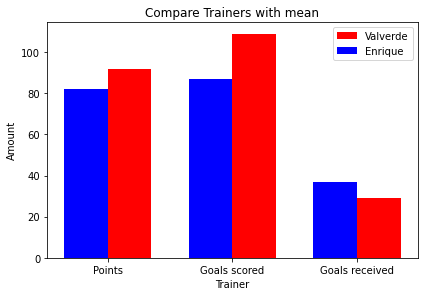

In [101]:
#Barchart
x=["Points", "Goals scored", "Goals received"]
y_valverde = (la_liga_valverde["Points"], la_liga_valverde["Goals Scored"], la_liga_valverde["Goals received"])
y_enrique = (la_liga_enrique["Points"], la_liga_enrique["Goals Scored"], la_liga_enrique["Goals received"])

# create plot
fig, ax = plt.subplots()
index = np.arange(len(x))
bar_width = 0.35
opacity = 0.5

plt.xticks(y_valverde, x)
ax.bar(index+(bar_width/2),  y_enrique, bar_width, color="r", label="Valverde")
ax.bar(index-(bar_width/2), y_valverde, bar_width, color="b", label="Enrique")

ax.set_xticks(index)
ax.set_xticklabels(x)

plt.ylabel("Amount")
plt.xlabel("Trainer")

plt.legend()
plt.tight_layout()
plt.title("Compare Trainers with mean")
plt.show()

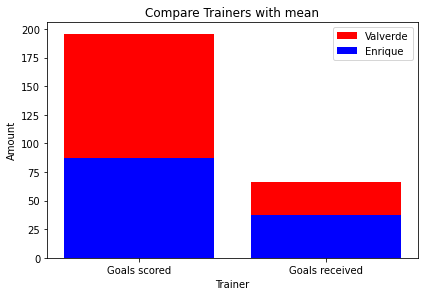

In [102]:
x=["Goals scored", "Goals received"]
y_valverde = (la_liga_valverde["Goals Scored"], la_liga_valverde["Goals received"])
y_enrique = (la_liga_enrique["Goals Scored"], la_liga_enrique["Goals received"])

# create plot
fig, ax = plt.subplots()
index = np.arange(len(x))
bar_width = 0.35
opacity = 0.5

plt.xticks(y_valverde, x)
ax.bar(x, y_enrique,  bottom=y_valverde, color="r", label="Valverde")
ax.bar(x, y_valverde,  color="b", label="Enrique")

ax.set_xticks(index)
ax.set_xticklabels(x)

plt.ylabel("Amount")
plt.xlabel("Trainer")

plt.legend()
plt.tight_layout()
plt.title("Compare Trainers with mean")
plt.show()

## Wie hat sich die Anzahl der geschossenen Heim.- Auswärts Tore über die Jahre 2015-2020 verändert?

In [103]:
la_liga_goals = la_liga.groupby(["year"])["Home Team Goals Scored", "Away Team Goals Scored"].sum()
print(la_liga_goals)

      Home Team Goals Scored  Away Team Goals Scored
year                                                
2014                     584                     425
2015                     615                     428
2016                     632                     486
2017                     588                     436
2018                     552                     431
2019                     546                     396
2020                     520                     433


/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_3415/3812898835.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  la_liga_goals = la_liga.groupby(["year"])["Home Team Goals Scored", "Away Team Goals Scored"].sum()


Text(0.5, 0, 'Year')

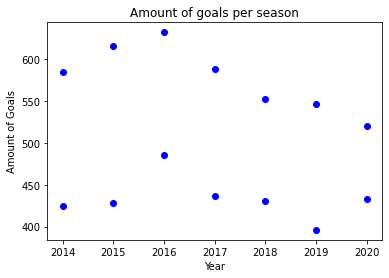

In [104]:
#Linechart
x = range(2014,2021)
y_home = la_liga_goals["Home Team Goals Scored"]
y_away = la_liga_goals["Away Team Goals Scored"]
plt.scatter(x,y_home, color="blue")
plt.scatter(x, y_away, color="blue")
plt.title("Amount of goals per season")
plt.ylabel("Amount of Goals")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

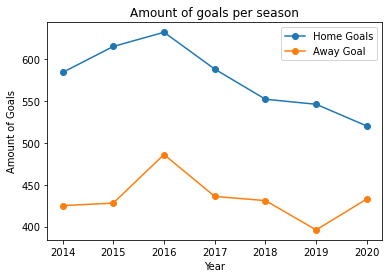

In [105]:
#Linechart
x = range(2014,2021)
y_home = la_liga_goals["Home Team Goals Scored"]
y_away = la_liga_goals["Away Team Goals Scored"]
plt.plot(x,y_home, label="Home Goals", marker='o')
plt.plot(x, y_away,label="Away Goal", marker='o')
plt.legend()
plt.title("Amount of goals per season")
plt.ylabel("Amount of Goals")
plt.xlabel("Year")

In [106]:
la_liga_goals["year"] = [2014,2015,2016,2017,2018,2019,2020]

In [107]:
la_liga_goals_melt = pd.melt(la_liga_goals, id_vars = "year")

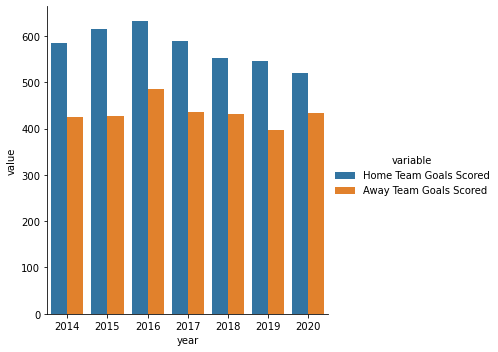

In [108]:
sns.catplot(x="year", y="value", hue="variable", data=la_liga_goals_melt, kind="bar")
plt.show()

In [109]:
#Scatterplot
dict_goals_2014 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2015 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2016 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2017 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2018 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2019 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
dict_goals_2020 = {0: 0, 1: 0, 2: 0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}


for i in range(len(la_liga)):
    if la_liga["year"][i] == 2014:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2014:
            dict_goals_2014[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2014.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2014:
            dict_goals_2014[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2014.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2015:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2015:
            dict_goals_2015[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2015.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2015:
            dict_goals_2015[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2015.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2016:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2016:
            dict_goals_2016[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2016.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2016:
            dict_goals_2016[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2016.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2017:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2017:
            dict_goals_2017[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2017.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2017:
            dict_goals_2017[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2017.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2018:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2018:
            dict_goals_2018[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2018.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2018:
            dict_goals_2018[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2018.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2019:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2019:
            dict_goals_2019[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2019.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2019:
            dict_goals_2019[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2019.update({la_liga["Away Team Goals Scored"][i]:0})
    if la_liga["year"][i] == 2020:
        if la_liga["Home Team Goals Scored"][i] in dict_goals_2020:
            dict_goals_2020[la_liga["Home Team Goals Scored"][i]] += 1
        else:
            dict_goals_2020.update({la_liga["Home Team Goals Scored"][i]:0})
        if la_liga["Away Team Goals Scored"][i] in dict_goals_2020:
            dict_goals_2020[la_liga["Away Team Goals Scored"][i]] += 1
        else:
            dict_goals_2020.update({la_liga["Away Team Goals Scored"][i]:0})

print(dict_goals_2015)

{0: 214, 1: 259, 2: 166, 3: 72, 4: 25, 5: 15, 6: 6, 7: 1, 8: 1, 9: 0, 10: 1}


In [110]:
goals = []
i = 0
while i <= 10:
    for n in range(0,dict_goals_2014[i]):
        goals.append(i)
    for n in range(0,dict_goals_2015[i]):
        goals.append(i)
    for n in range(0,dict_goals_2016[i]):
        goals.append(i)
    for n in range(0,dict_goals_2017[i]):
        goals.append(i)
    for n in range(0,dict_goals_2018[i]):
        goals.append(i)
    for n in range(0,dict_goals_2019[i]):
        goals.append(i)
    for n in range(0,dict_goals_2020[i]):
        goals.append(i)
    i += 1

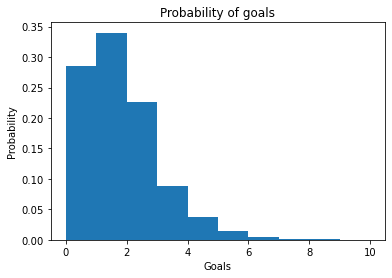

In [111]:
plt.hist(x=goals, density=True)
plt.title("Probability of goals")
plt.xlabel("Goals")
plt.ylabel("Probability")
plt.show()

# Haben die Teams im Jahr 2014 mehr Heim oder Auswärts Tore geschossen

In [112]:
Heimtore = 0
Auswaertstore = 0

for i in range(len(la_liga)):
    Heimtore += la_liga["Home Team Goals Scored"][i]
    Auswaertstore += la_liga["Away Team Goals Scored"][i]

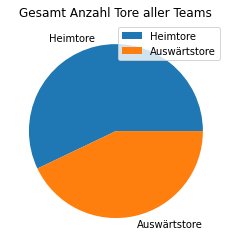

In [113]:
#Pichart
plt.pie(x=[Heimtore, Auswaertstore], labels=["Heimtore", "Auswärtstore"])
plt.title("Gesamt Anzahl Tore aller Teams")
plt.legend()
plt.show()

# Scatterplot

In [114]:
la_liga_2014_only = la_liga[la_liga["year"] == 2014]

In [115]:
la_liga_2014_only

,Home Team,Away Team,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,...,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,year,Home Team Goals ht,Away Team Goals ht,Home Team Result,Away Team Result
0,MÁLAGA,ATHLETIC,4.4,6.0,5.7,40,60,5.0,3.0,12.0,...,3.0,0.0,0.0,1,0,2014,1,0,3,0
1,SEVILLA FC,VALENCIA,4.7,6.5,6.8,47,53,4.0,3.0,12.0,...,2.0,0.0,1.0,1,1,2014,1,0,1,1
2,GRANADA,DEPORTIVO,4.6,7.2,5.9,53,47,6.0,3.0,10.0,...,3.0,0.0,0.0,2,1,2014,0,1,3,0
3,ALMERÍA,ESPANYOL,5.6,6.9,5.5,56,44,7.0,6.0,19.0,...,3.0,1.0,0.0,1,1,2014,0,0,1,1
4,EIBAR,REAL SOCIEDAD,3.7,6.5,5.9,41,59,5.0,5.0,12.0,...,1.0,0.0,0.0,1,0,2014,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,GRANADA,ATLETICO MADRID,1.4,6.3,6.5,51,49,2.0,0.0,2.0,...,0.0,0.0,0.0,0,0,2014,0,0,1,1
376,CELTA,ESPANYOL,7.9,6.7,6.1,51,49,2.0,7.0,10.0,...,1.0,0.0,0.0,3,2,2014,1,1,3,0
377,ALMERÍA,VALENCIA,7.4,5.8,6.4,52,48,5.0,3.0,9.0,...,5.0,1.0,0.0,2,3,2014,2,2,0,3
378,EIBAR,CÓRDOBA,5.0,7.2,5.8,40,60,4.0,6.0,12.0,...,0.0,0.0,0.0,3,0,2014,3,0,3,0


In [116]:
y_home = [la_liga_2014_only["Home Team Rating"]]
y_away = [la_liga_2014_only["Away Team Rating"]]
x = [la_liga_2014_only["Match Excitement"]]

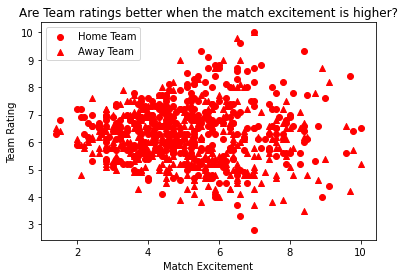

In [117]:
plt.scatter(x,y_home, marker="o", label="Home Team", c="red")
plt.scatter(x,y_away, marker="^", label="Away Team", c="red")
plt.xlabel("Match Excitement")
plt.ylabel("Team Rating")
plt.title("Are Team ratings better when the match excitement is higher?")
plt.legend()
plt.show()

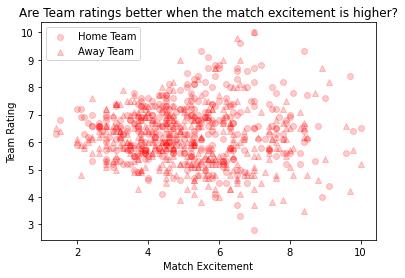

In [118]:
plt.scatter(x,y_home, alpha=0.2, marker="o", label="Home Team", c="red")
plt.scatter(x,y_away, alpha=0.2, marker="^", label="Away Team", c="red")
plt.xlabel("Match Excitement")
plt.ylabel("Team Rating")
plt.title("Are Team ratings better when the match excitement is higher?")
plt.legend()
plt.show()

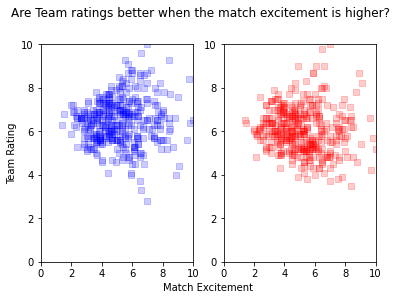

In [119]:
plt.subplot(1,2,1)
plt.scatter(x,y_home, marker="s", alpha=0.2, label="Home Team", c="blue")
plt.ylabel("Team Rating")
plt.title("Are Team ratings better when the match excitement is higher?", x=1.05, y=1.1)
plt.xlim(0,10)
plt.ylim(0,10)


plt.subplot(1,2,2)
plt.scatter(x,y_away, marker="s", alpha=0.2, label="Away Team", c="red")
plt.xlabel("Match Excitement", x=-0.1)
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

In [120]:
x_sns = []
y_sns = []
for i in range(len(x)):
    x_sns = x[i] * 10
    y_sns = y_home[i] * 10
x_sns = list(x_sns)
y_sns = list(y_sns)
print(x_sns)
print(y_sns)

[44.0, 47.0, 46.0, 56.0, 37.0, 51.0, 70.0, 47.0, 47.0, 21.0, 32.0, 53.0, 47.0, 42.0, 54.0, 57.0, 52.0, 70.0, 90.0, 50.0, 45.0, 43.0, 31.0, 55.0, 84.0, 74.0, 63.0, 43.0, 26.0, 28.0, 42.0, 89.0, 31.0, 75.0, 84.0, 83.0, 85.0, 62.0, 59.0, 51.0, 75.0, 51.0, 37.0, 45.0, 56.0, 22.0, 41.0, 30.0, 38.0, 45.0, 39.0, 46.0, 70.0, 53.0, 44.0, 20.0, 28.0, 39.0, 44.0, 21.0, 58.0, 64.0, 53.0, 85.0, 62.0, 70.0, 69.0, 65.0, 45.0, 72.0, 33.0, 65.0, 38.0, 60.0, 52.0, 46.0, 51.0, 40.0, 45.0, 72.0, 51.0, 28.0, 74.0, 58.0, 45.0, 38.0, 53.0, 26.0, 64.0, 39.0, 53.0, 65.0, 80.0, 54.0, 31.0, 26.0, 62.0, 58.0, 74.0, 78.0, 26.0, 61.0, 28.0, 76.0, 63.0, 24.0, 52.0, 47.0, 15.0, 54.0, 58.0, 56.0, 59.0, 57.0, 32.0, 38.0, 57.0, 74.0, 55.0, 35.0, 52.0, 63.0, 53.0, 79.0, 46.0, 38.0, 68.0, 40.0, 41.0, 33.0, 32.0, 36.0, 59.0, 36.0, 35.0, 59.0, 70.0, 46.0, 76.0, 40.0, 68.0, 26.0, 54.0, 28.0, 41.0, 65.0, 23.0, 35.0, 49.0, 34.0, 36.0, 65.0, 42.0, 28.0, 61.0, 53.0, 43.0, 56.0, 47.0, 64.0, 64.0, 41.0, 81.0, 31.0, 52.0, 66.0, 67.

In [121]:
sns.heatmap(x_sns, y_sns, cmap="plasma")

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: Inconsistent shape between the condition and the input (got (380, 1) and (380,))